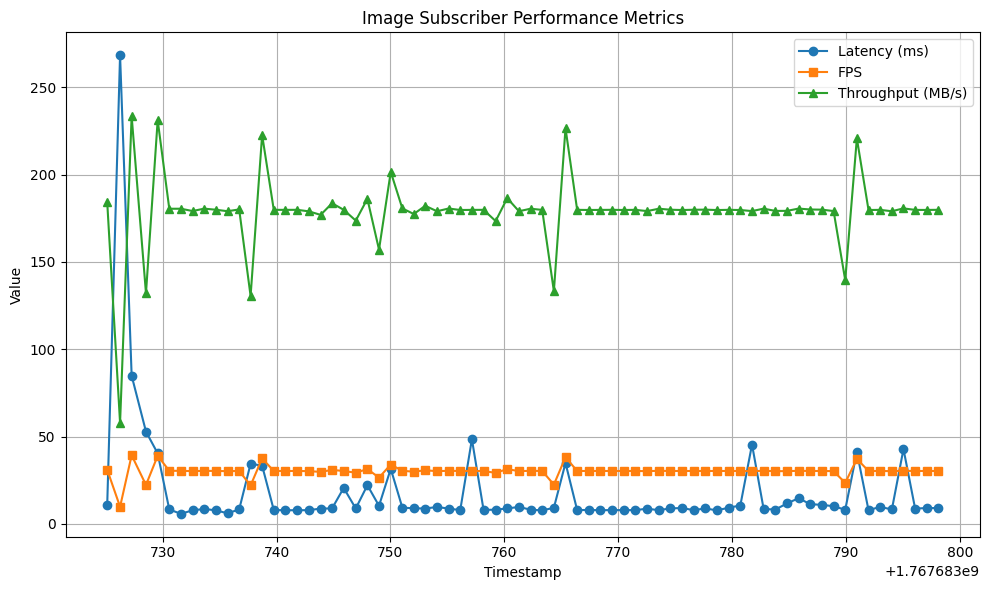

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 读取日志文件
with open("log.txt", "r") as f:   # 假设日志文件名为 log.txt
    lines = f.readlines()

# 正则表达式提取数据
pattern = re.compile(r"\[INFO\] \[(\d+\.\d+)\] .*Latency avg: (\d+(?:\.\d+)?) ms \| FPS: (\d+(?:\.\d+)?) \| Throughput: (\d+(?:\.\d+)?) MB/s \| Size: (\d+(?:\.\d+)?) MB")

timestamps, latency, fps, throughput, size = [], [], [], [], []

for line in lines:
    match = pattern.search(line)
    if match:
        timestamps.append(float(match.group(1)))
        latency.append(float(match.group(2)))
        fps.append(float(match.group(3)))
        throughput.append(float(match.group(4)))
        size.append(float(match.group(5)))

# 转为 DataFrame
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Latency(ms)": latency,
    "FPS": fps,
    "Throughput(MB/s)": throughput,
    "Size(MB)": size
})

# 绘制折线图
plt.figure(figsize=(10, 6))

plt.plot(df["Timestamp"], df["Latency(ms)"], label="Latency (ms)", marker="o")
plt.plot(df["Timestamp"], df["FPS"], label="FPS", marker="s")
plt.plot(df["Timestamp"], df["Throughput(MB/s)"], label="Throughput (MB/s)", marker="^")

plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Image Subscriber Performance Metrics")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 保存图像
plt.savefig("metrics.png")
plt.show()